In [10]:
import pandas as pd
import os

from pprint import pprint

test_dirs = os.path.join(os.getcwd(), 'data')

# Summary of Tests

In [28]:
test_summary_df = pd.DataFrame(columns=["builder_count", "validator_count", "nonvalidator_count"])

for test_dir in os.listdir(test_dirs):
    test_files = os.listdir(os.path.join(test_dirs, test_dir))

    builder_count = int(len([file for file in test_files if file.endswith("builder.csv")]) / 2)
    validator_count = int(len([file for file in test_files if file.endswith("validator.csv") and "non" not in file]) / 2)
    nonvalidator_count = int(len([file for file in test_files if file.endswith("nonvalidator.csv")]) / 2)

    new_row = {"builder_count": builder_count, "validator_count": validator_count, "nonvalidator_count": nonvalidator_count}
    test_summary_df = pd.concat([test_summary_df, pd.DataFrame([new_row])]).reset_index(drop=True)

test_summary_df.sort_values(by=["builder_count", "validator_count", "nonvalidator_count"], inplace=True)
# print(test_summary_df.to_markdown(index=False))

|   builder_count |   validator_count |   nonvalidator_count |
|----------------:|------------------:|---------------------:|
|               0 |                 9 |                   36 |
|               0 |                66 |                  279 |
|               0 |               170 |                  712 |
|               1 |                10 |                   39 |
|               1 |                20 |                   78 |
|               1 |                21 |                   81 |
|               1 |                66 |                  260 |
|               1 |                72 |                  267 |
|               1 |               102 |                  403 |
|               1 |               181 |                  689 |
|               1 |               210 |                  829 |
|               1 |               280 |                 1115 |

# Total PUT/GET Per Peer Type

## Validator PUT/GET

<Figure size 2000x1000 with 0 Axes>

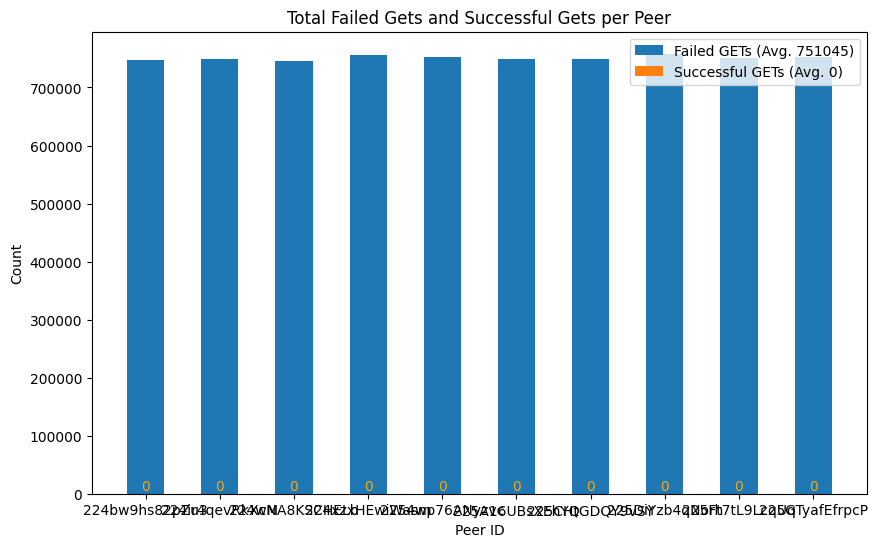

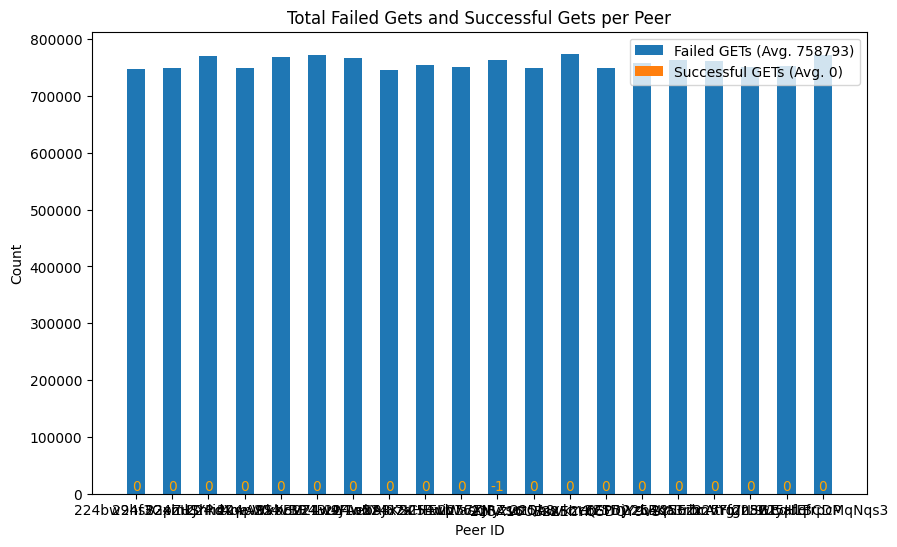

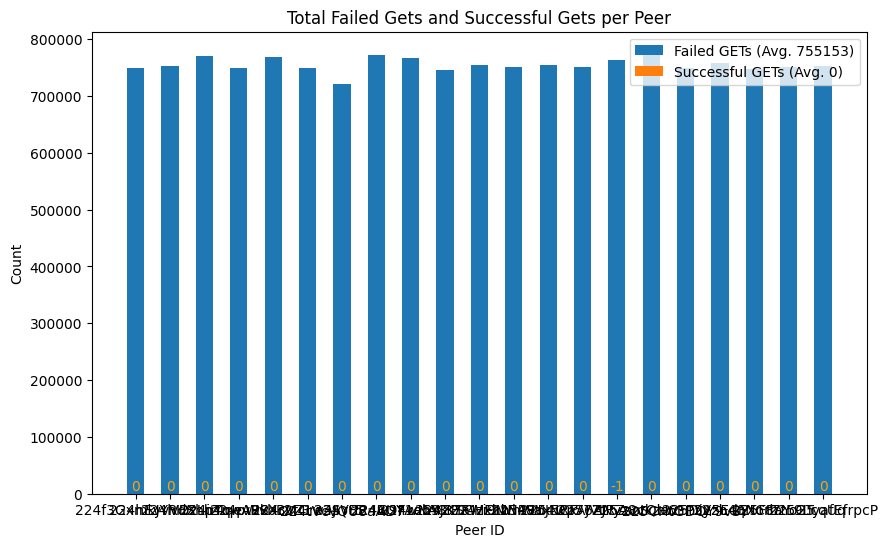

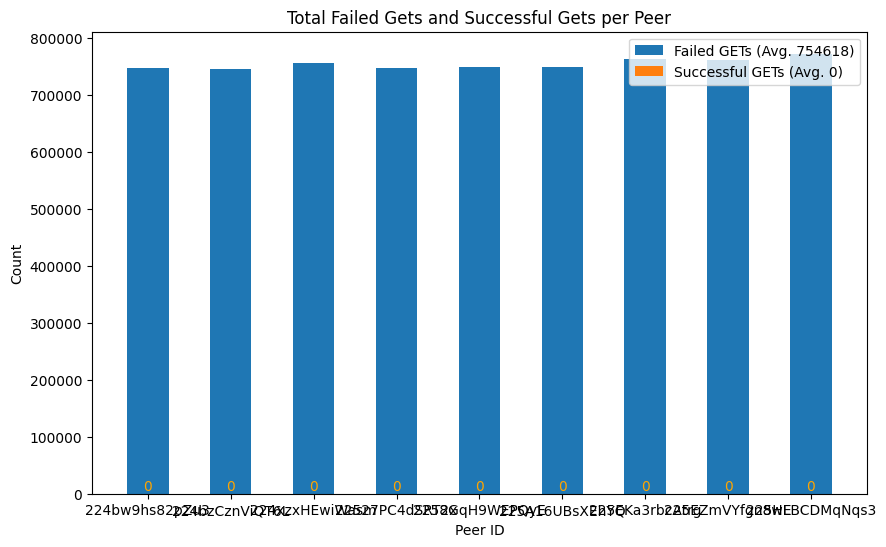

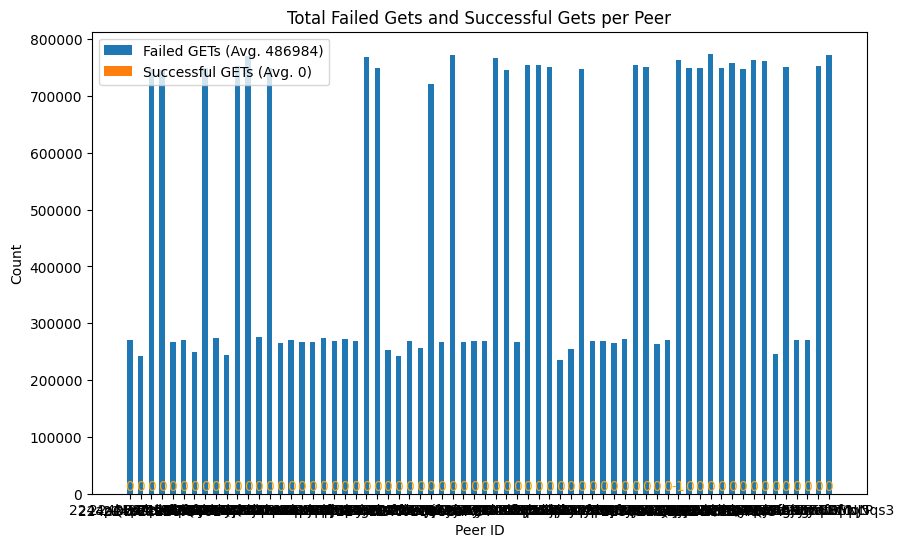

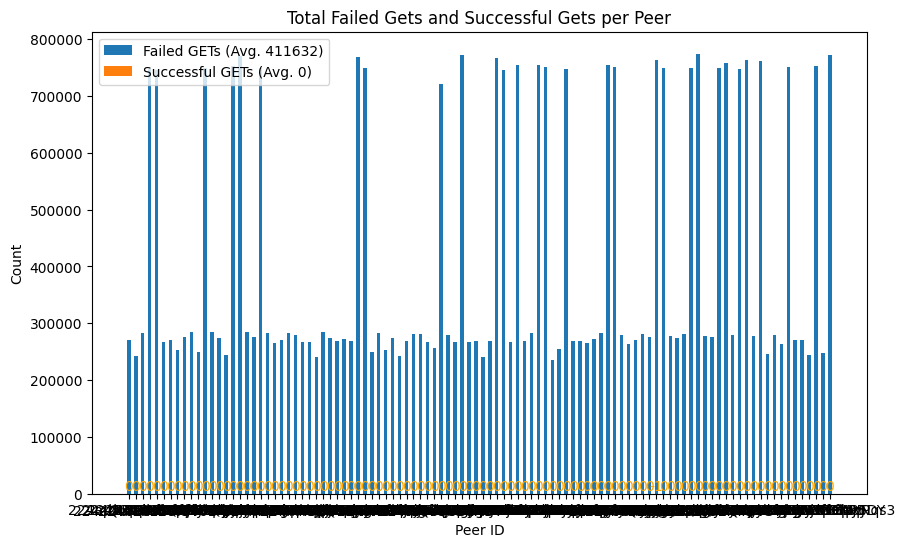

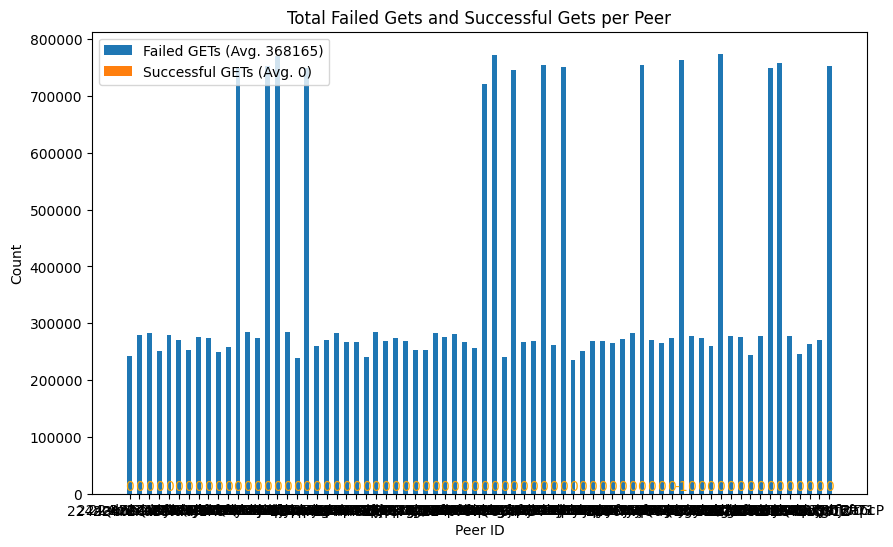

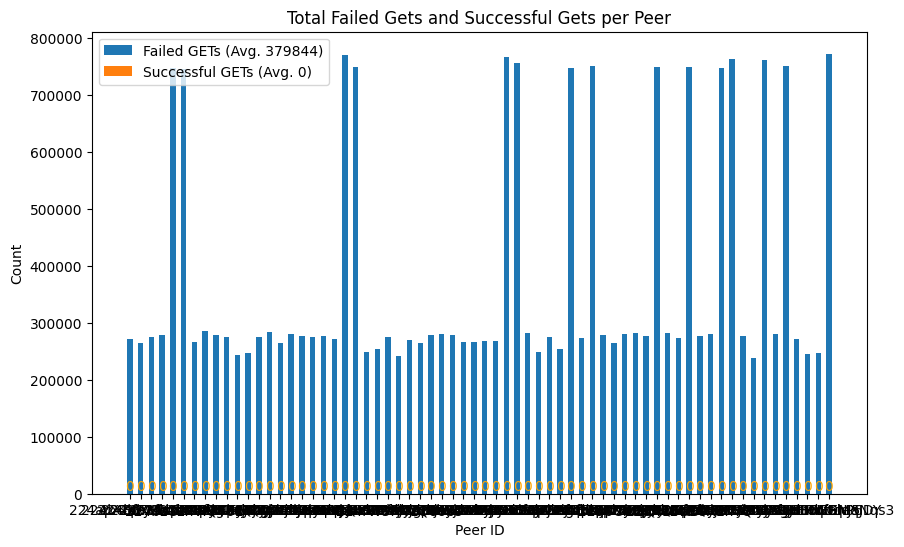

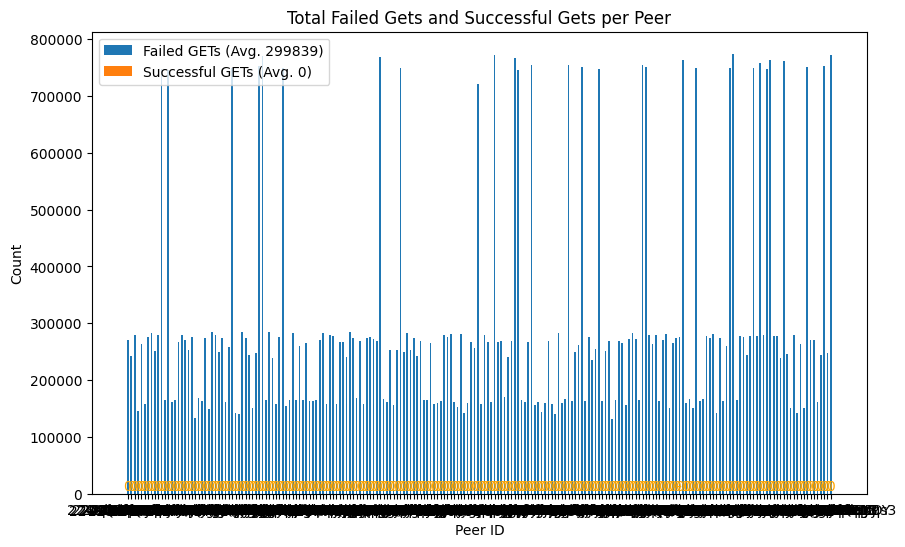

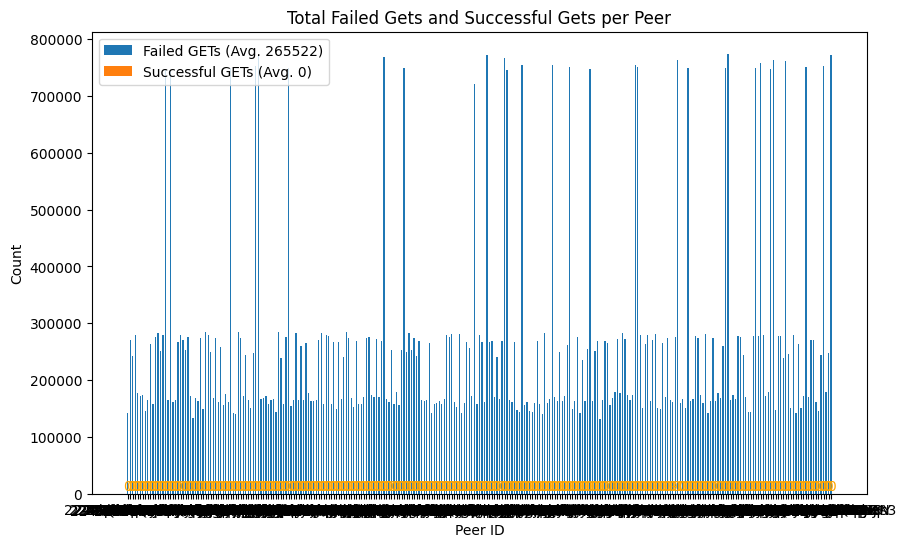

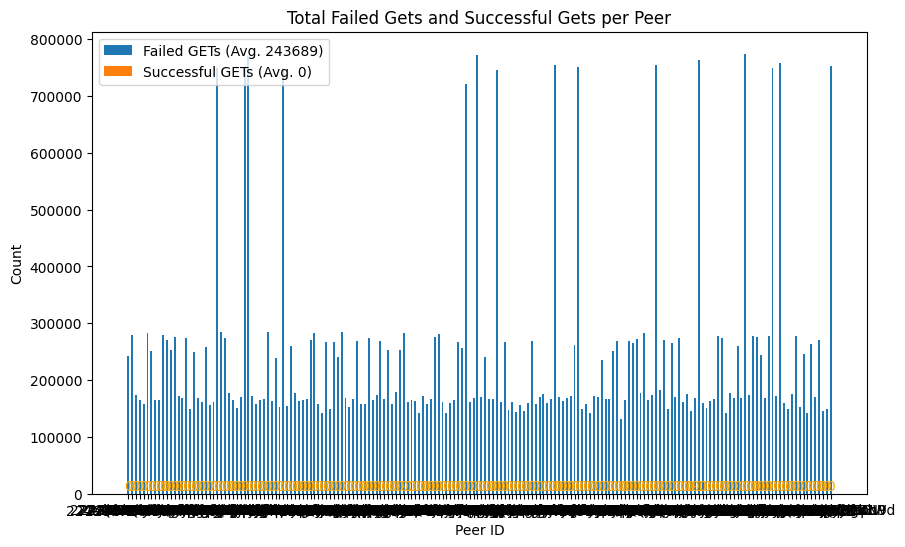

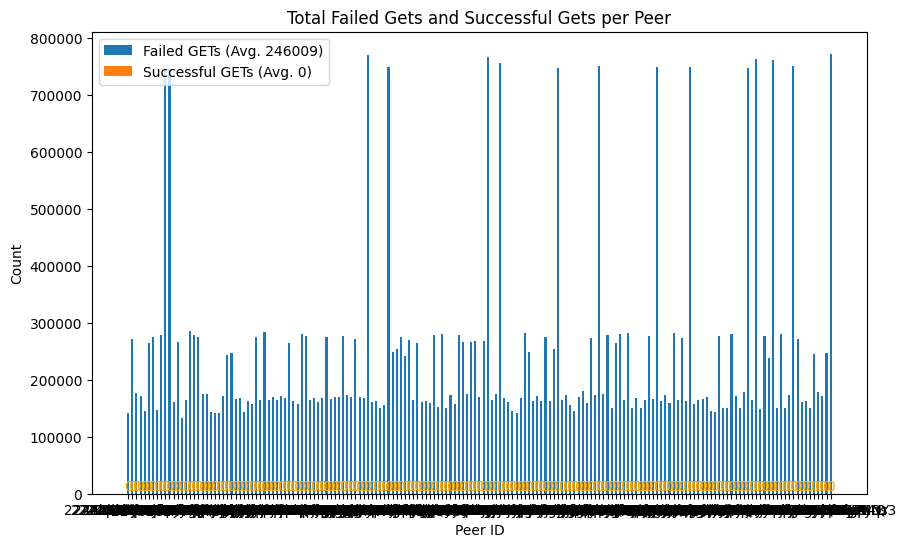

In [32]:

_ = plt.figure(figsize=(20, 10))

for test_dir in os.listdir(test_dirs):
    test_files = [file for file in os.listdir(os.path.join(test_dirs, test_dir)) if file.endswith('.csv')]

    # ? Get all validators total stats
    validator_total_stats_files = [file for file in test_files if file.endswith('total_stats_validator.csv')]

    total_stats_df = pd.DataFrame(columns=["peer_id", "total_gets", "failed_gets", "successful_gets"])

    for file in validator_total_stats_files:
        peer_id = file.split("_")[0]
        df = pd.read_csv(os.path.join(test_dirs, test_dir, file))

        total_gets = df["Total GET messages"].max()
        failed_gets = df["Total failed GETs"].max()
        successful_gets = total_gets - failed_gets
        new_row = pd.DataFrame([[peer_id, total_gets, failed_gets, successful_gets]], columns=["peer_id", "total_gets", "failed_gets", "successful_gets"])

        total_stats_df = pd.concat([
            total_stats_df,
            new_row
        ]).reset_index(drop=True)

    import matplotlib.pyplot as plt

    # Plotting the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(
        total_stats_df["peer_id"], 
        total_stats_df["failed_gets"], 
        label="Failed GETs (Avg. " + str(round(total_stats_df["failed_gets"].mean())) + ")",
        width=0.5  # Make the bars thinner
    )
    plt.bar(
        total_stats_df["peer_id"], 
        total_stats_df["successful_gets"], 
        label="Successful GETs (Avg. " + str(round(total_stats_df["successful_gets"].mean())) + ")",
        width=0.5  # Make the bars thinner
    )
    plt.xlabel("Peer ID")
    plt.ylabel("Count")
    plt.title("Total Failed Gets and Successful Gets per Peer")

    # Show the number of successful gets on top of the bar
    for i, successful_gets in enumerate(total_stats_df["successful_gets"]):
        plt.text(i, successful_gets, str(successful_gets), ha='center', va='bottom', color='orange')

    plt.legend()
    plt.show()

## Non-Validator PUT/GET

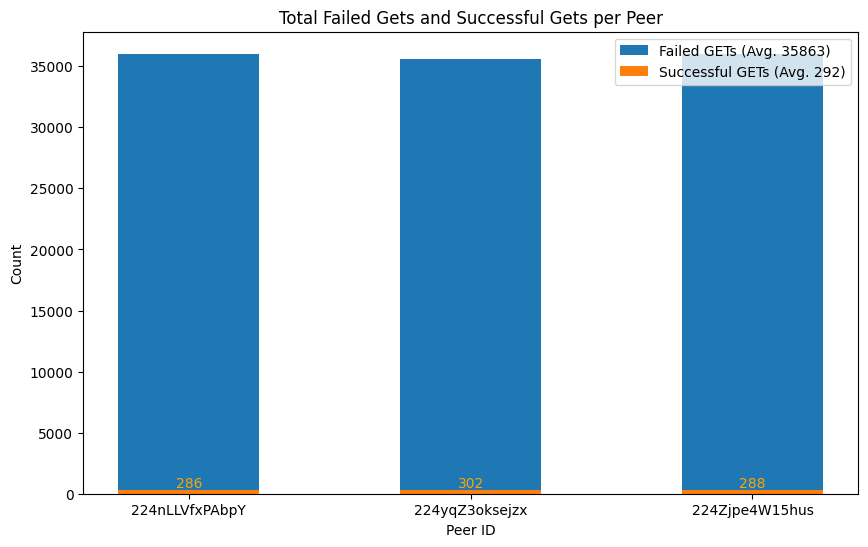

In [9]:
# ? Get all nonvalidators total stats
nonvalidator_total_stats_files = [file for file in os.listdir(data_dir) if file.endswith('total_stats_nonvalidator.csv')]

total_stats_df = pd.DataFrame(columns=["peer_id", "total_gets", "failed_gets", "successful_gets"])

for file in nonvalidator_total_stats_files:
    peer_id = file.split("_")[0]
    df = pd.read_csv(os.path.join(data_dir, file))

    total_gets = df["Total GET messages"].max()
    failed_gets = df["Total failed GETs"].max()
    successful_gets = total_gets - failed_gets
    new_row = pd.DataFrame([[peer_id, total_gets, failed_gets, successful_gets]], columns=["peer_id", "total_gets", "failed_gets", "successful_gets"])

    total_stats_df = pd.concat([
        total_stats_df,
        new_row
    ]).reset_index(drop=True)

import matplotlib.pyplot as plt

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(
    total_stats_df["peer_id"], 
    total_stats_df["failed_gets"], 
    label="Failed GETs (Avg. " + str(round(total_stats_df["failed_gets"].mean())) + ")",
    width=0.5  # Make the bars thinner
)
plt.bar(
    total_stats_df["peer_id"], 
    total_stats_df["successful_gets"], 
    label="Successful GETs (Avg. " + str(round(total_stats_df["successful_gets"].mean())) + ")",
    width=0.5  # Make the bars thinner
)
plt.xlabel("Peer ID")
plt.ylabel("Count")
plt.title("Total Failed Gets and Successful Gets per Peer")

# Show the number of successful gets on top of the bar
for i, successful_gets in enumerate(total_stats_df["successful_gets"]):
    plt.text(i, successful_gets, str(successful_gets), ha='center', va='bottom', color='orange')

plt.legend()
plt.show()

# Latencies Per Peer Type

## Validators

C:\Users\kalee\AppData\Local\Temp\ipykernel_11968\2765031087.py:44: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\kalee\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


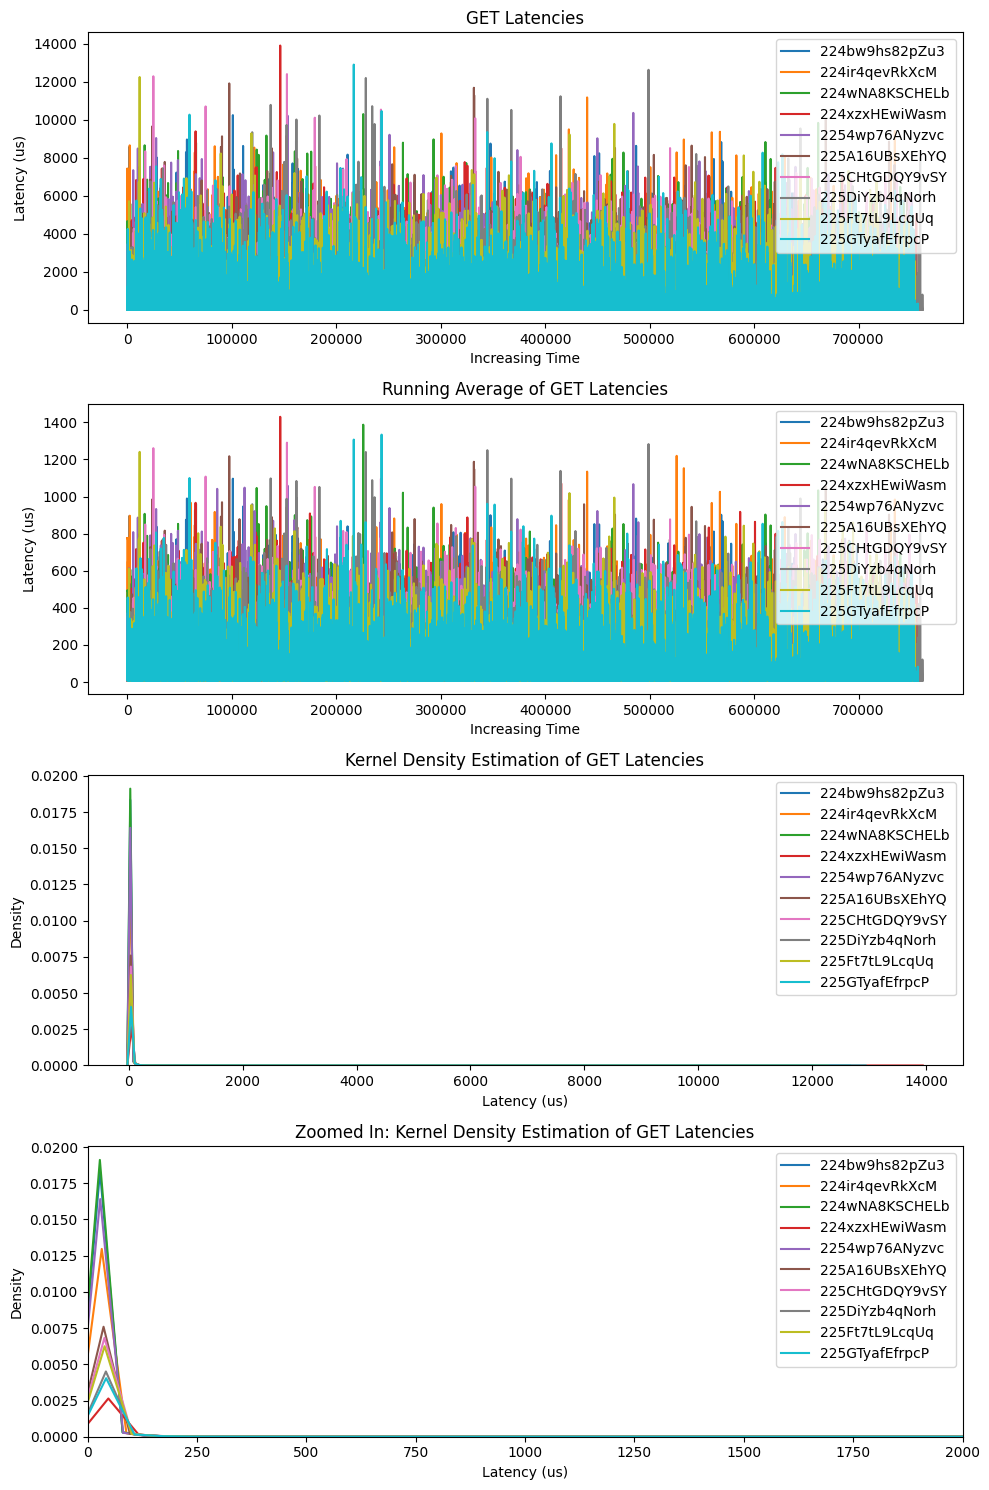

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

for test_dir in os.listdir(test_dirs):
    test_files = [file for file in os.listdir(os.path.join(test_dirs, test_dir)) if file.endswith('.csv')]
    validator_latency_files = [file for file in test_files if file.endswith('latency_stats_validator.csv')]

    total_stats_df = pd.DataFrame(columns=["peer_id", "get_latencies"])

    fig, axes = plt.subplots(2, 1, figsize=(10, 15))

    for file in validator_latency_files:
        peer_id = file.split("_")[0]
        df = pd.read_csv(os.path.join(test_dirs, test_dir, file))

        total_gets = df["GET latencies (us)"]
        running_avg = total_gets.rolling(window=10).mean()
        # axes[0].plot(total_gets, label=peer_id)
        # axes[1].plot(running_avg, label=peer_id)
        sns.kdeplot(total_gets, ax=axes[0], label=peer_id)
        sns.kdeplot(total_gets, ax=axes[1], label=peer_id)

    # axes[0].set_xlabel("Increasing Time")
    # axes[0].set_ylabel("Latency (us)")
    # axes[0].legend()
    # axes[0].set_title("GET Latencies")

    # axes[1].set_xlabel("Increasing Time")
    # axes[1].set_ylabel("Latency (us)")
    # axes[1].legend()
    # axes[1].set_title("Running Average of GET Latencies")

    axes[0].set_xlabel("Latency (us)")
    axes[0].set_ylabel("Density")
    axes[0].legend()
    axes[0].set_title("Kernel Density Estimation of GET Latencies")

    axes[1].set_xlabel("Latency (us)")
    axes[1].set_ylabel("Density")
    axes[1].set_xlim(0, 2000)
    axes[1].legend()
    axes[1].set_title("Zoomed In: Kernel Density Estimation of GET Latencies")

    plt.tight_layout()
    plt.show()

## Non-Validators

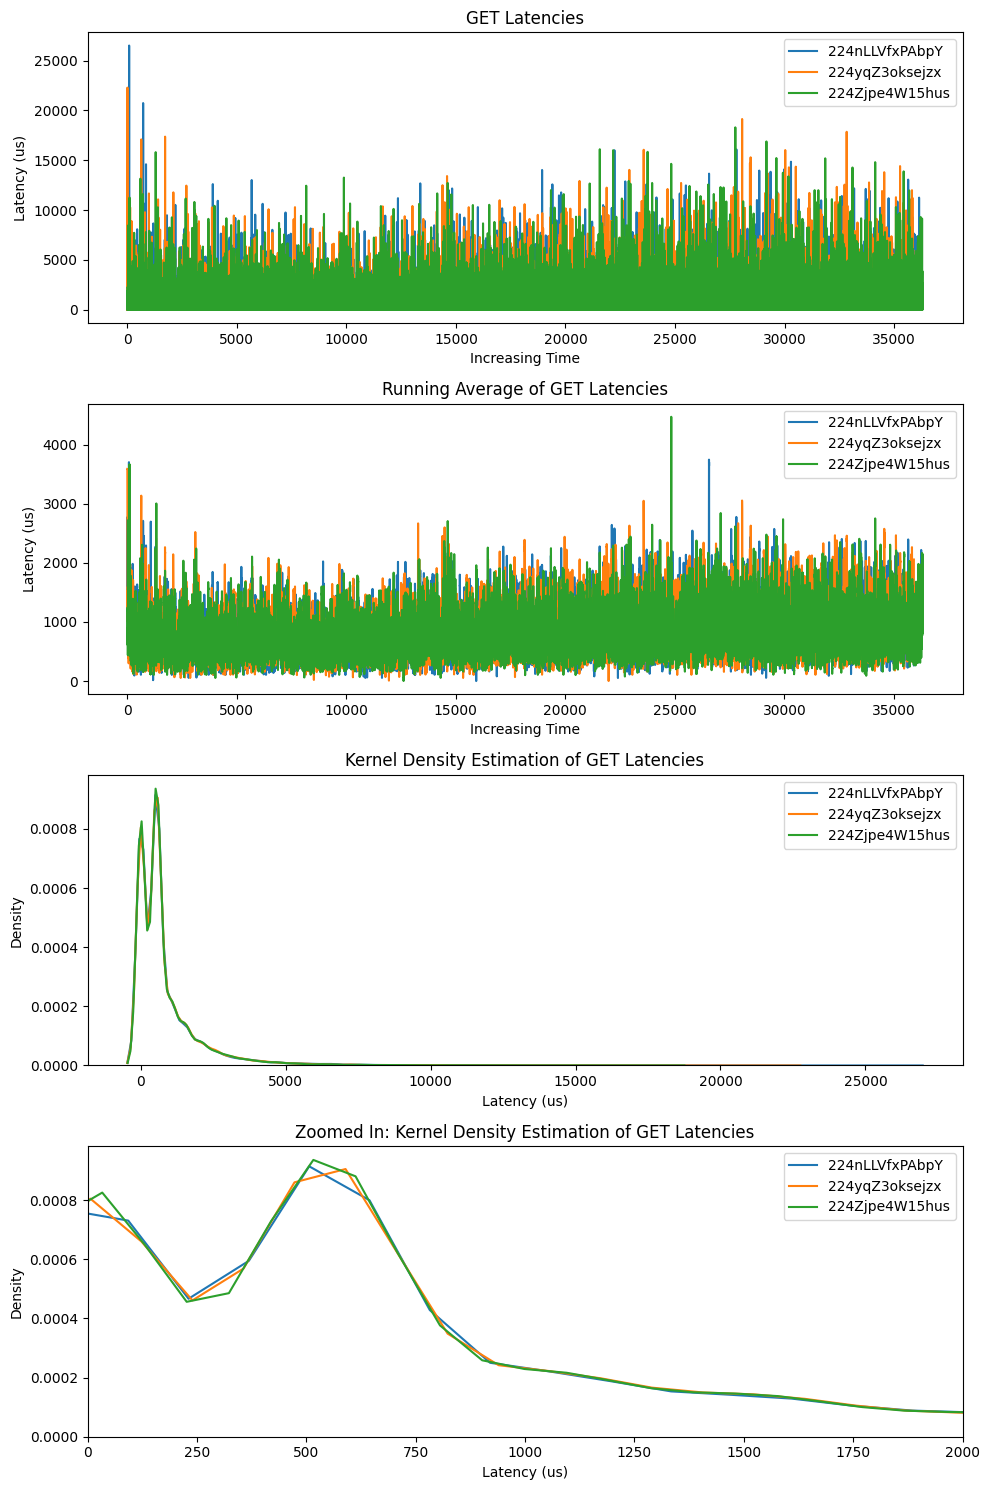

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

latency_files = [file for file in os.listdir(data_dir) if file.endswith('latency_stats_nonvalidator.csv')]

total_stats_df = pd.DataFrame(columns=["peer_id", "get_latencies"])

fig, axes = plt.subplots(4, 1, figsize=(10, 15))

for file in latency_files:
    peer_id = file.split("_")[0]
    df = pd.read_csv(os.path.join(data_dir, file))

    total_gets = df["GET latencies (us)"]
    running_avg = total_gets.rolling(window=10).mean()
    axes[0].plot(total_gets, label=peer_id)
    axes[1].plot(running_avg, label=peer_id)
    sns.kdeplot(total_gets, ax=axes[2], label=peer_id)
    sns.kdeplot(total_gets, ax=axes[3], label=peer_id)

axes[0].set_xlabel("Increasing Time")
axes[0].set_ylabel("Latency (us)")
axes[0].legend()
axes[0].set_title("GET Latencies")

axes[1].set_xlabel("Increasing Time")
axes[1].set_ylabel("Latency (us)")
axes[1].legend()
axes[1].set_title("Running Average of GET Latencies")

axes[2].set_xlabel("Latency (us)")
axes[2].set_ylabel("Density")
axes[2].legend()
axes[2].set_title("Kernel Density Estimation of GET Latencies")

axes[3].set_xlabel("Latency (us)")
axes[3].set_ylabel("Density")
axes[3].set_xlim(0, 2000)
axes[3].legend()
axes[3].set_title("Zoomed In: Kernel Density Estimation of GET Latencies")

plt.tight_layout()
plt.show()

# Sampling Time per Peer Type

## Validators

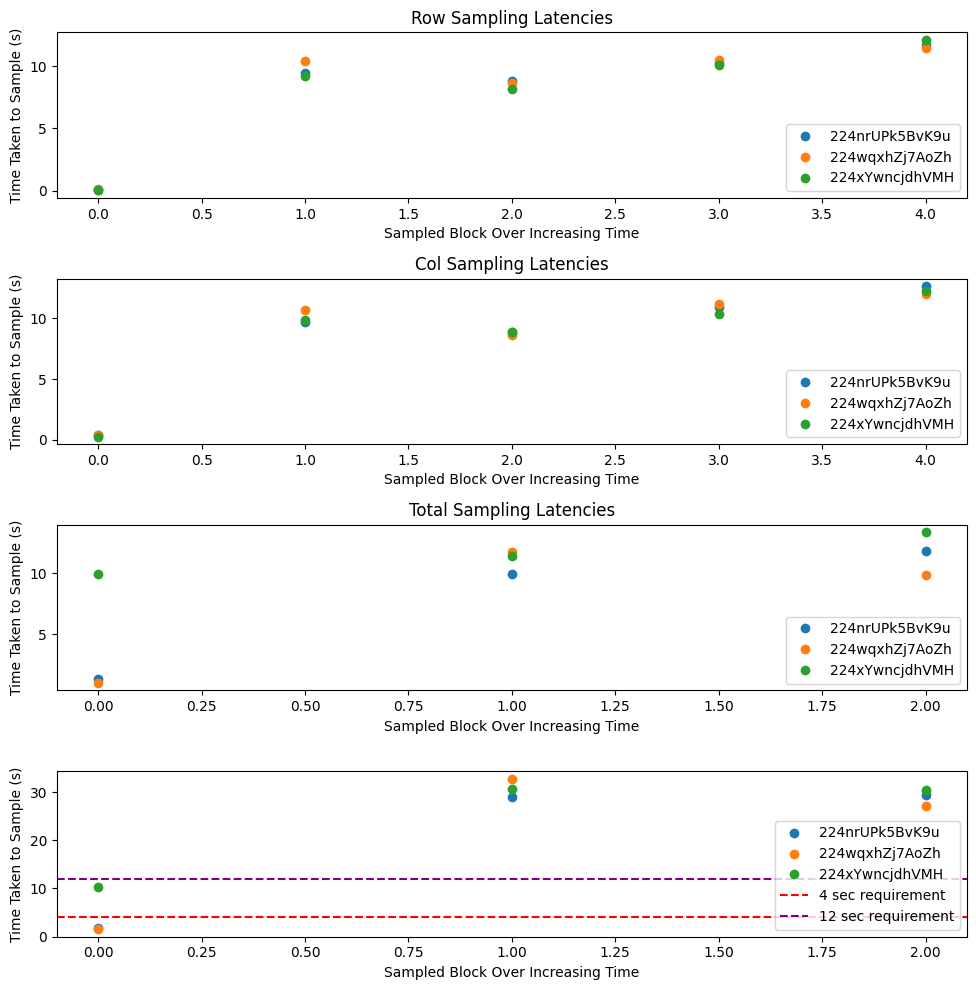

In [12]:
import matplotlib.pyplot as plt
import numpy as np

latency_files = [file for file in os.listdir(data_dir) if file.endswith('latency_stats_validator.csv')]

fig, axes = plt.subplots(4, 1, figsize=(10, 10))

for file in latency_files:
    df = pd.read_csv(os.path.join(data_dir, file))

    row_sampling_latencies_sec = df["Row Sampling Latencies (us)"] / 1_000_000
    col_sampling_latencies_sec = df["Col Sampling Latencies (us)"] / 1_000_000
    random_sampling_latencies_sec = df["Random Sampling Latencies (us)"] / 1_000_000
    
    total_lat_us = []

    for row in df.iterrows():
        row_lat_us = row[1]["Row Sampling Latencies (us)"]
        col_lat_us = row[1]["Col Sampling Latencies (us)"]
        rand_lat_us = row[1]["Random Sampling Latencies (us)"]
        total_lat_us.append(row_lat_us + col_lat_us + rand_lat_us)
        

    total_lat_sec = np.array(total_lat_us) / 1_000_000

    axes[0].plot(row_sampling_latencies_sec, label=file.split("_")[0], marker="o", linestyle="none")
    axes[1].plot(col_sampling_latencies_sec, label=file.split("_")[0], marker="o", linestyle="none")
    axes[2].plot(random_sampling_latencies_sec, label=file.split("_")[0], marker="o", linestyle="none")
    axes[3].plot(total_lat_sec, label=file.split("_")[0], marker="o", linestyle="none")

axes[0].set_title("Row Sampling Latencies")
axes[1].set_title("Col Sampling Latencies")
axes[2].set_title("Random Sampling Latencies")
axes[2].set_title("Total Sampling Latencies")

axes[3].axhline(y=4, color='red', linestyle='--', label="4 sec requirement")
axes[3].axhline(y=12, color='purple', linestyle='--', label="12 sec requirement")

for ax in axes:
    ax.set_xlabel("Sampled Block Over Increasing Time")
    ax.set_ylabel("Time Taken to Sample (s)")
    ax.legend()

plt.tight_layout()